# Generate data sets for data fitting exercises
## DMM

In [39]:
import os
import socket
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

## Directory housekeeping

In [40]:
# get the location of the 'intro_curve_fitting_python' directory on the local machine;
# change into it or throw an error and force a kernel restart (in a jupyter notebook)

# or edit the following to reflect the local machine name and preferred directory
if not socket.gethostname() == 'apokalite': # local machine name
    basedir = input('Enter the full path of the directory \'intro_curve_fitting_python\' on your machine.\n') 
    if basedir == '':
        print('You must name a default directory. The kernel will now restart; rerun this program.\n')
        quit()
else:
    basedir = '/home/david/gh/intro_curve_fitting_python' # preferred local directory
    
try:
    os.chdir(basedir)
except:
    print('\nThat directory does not exist. The kernel will now restart; rerun this program.\n')
    quit()

In [41]:
# verify that expected data subdirectories exist; create them if not

# subdirectory for linear data 
td = basedir+'/linear_data'
if not os.path.isdir(td):
    os.mkdir(td)

# subdirectory for exponential data 
td = basedir+'/exponential_data'
if not os.path.isdir(td):
    os.mkdir(td)

# subdirectory for thermal denaturation data 
td = basedir+'/thermal_denaturation_data'
if not os.path.isdir(td):
    os.mkdir(td)

# subdirectory for decaying sine data 
td = basedir+'/decaying_sine_data'
if not os.path.isdir(td):
    os.mkdir(td)


## Create noisy linear data sets

In [42]:
# create linear data
# set the linear data directory:
datadir = basedir+'/linear_data'

In [43]:
# develop an algorithm

# randomly choose a slope between 0 and 5 and an intercept between -5 and +5
m = np.random.uniform(low=0, high=5)
b = np.random.uniform(low=-5, high=5)

# print the name of each variable,
# followed by its value as a floating point number with 2 decimal places
print(f'slope: %1.2f, intercept: %1.2f\n' % (m, b))

slope: 1.43, intercept: 1.58



In [44]:
# create a linear data series

# create an array of 15 equally-spaced x values spanning 0 through 5
x = np.linspace(0,5,15)

# create the array of y values corresponding to y = mx + b
y = m*x + b

# add random normally distributed noise
# compute sigma = 0.02 * y(max) - y(min)
sigma = 0.02 * (np.max(y) - np.min(y))

# add random error from a normal distribution having mean=0 and sigma as defined
# to each element of y
y = np.random.normal(0, sigma, 15) + y

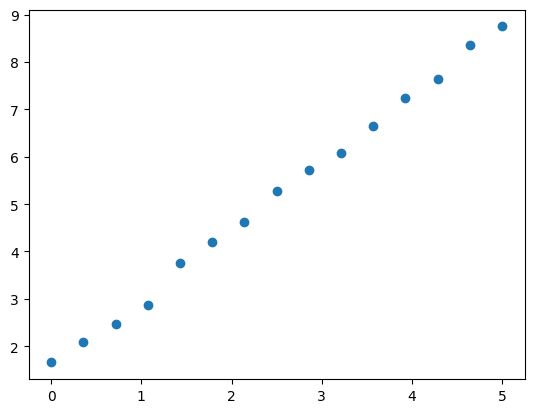

In [45]:
# make and show a scatter plot
plt.scatter(x,y)
plt.show()

In [46]:
# create a function that accomplishes all the number crunching given the necessary input parameters

def mklineards(minx, maxx, minm, maxm, minb, maxb, dec, nump):
    # most variable names self-explanatory, except:
    # dec: decimal (fraction) value to multiply by (y(max)-y(min)) to 
    # determine input sigma parameter to noise function
    # nump: 'number of points' to generate
    m = np.random.uniform(low=minm, high=maxm)
    b = np.random.uniform(low=minb, high=maxb)
    x = np.linspace(minx, maxx, nump)
    y = m * x + b
    y = y + np.random.normal(0, dec*(np.max(y) - np.min(y)), nump)
    return x,y

In [47]:
# run the function with the following parameters:

minx = -5
maxx = 5
minm = -5
maxm = -0.01
minb = 0
maxb = 5
dec = 0.1
nump = 15

x,y = mklineards(minx, maxx, minm, maxm, minb, maxb, dec, nump)

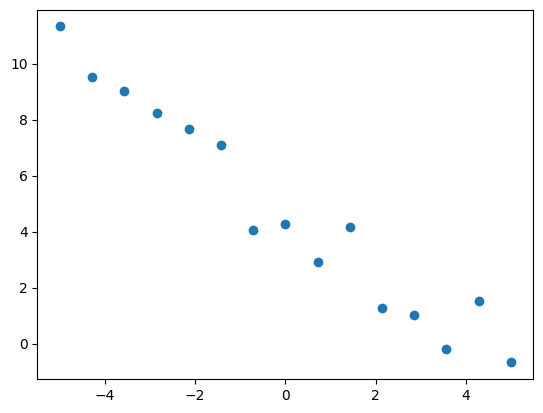

In [48]:
# make and show a scatter plot
plt.scatter(x,y)
plt.show()

In [49]:
# create a function to save the dataset to a csv file
def savexy(x,y,fn):
    # variable names self-explanatory, except:
    # fn: filename, a string
    a = np.column_stack((x,y))
    ofn = datadir+'/'+fn
    np.savetxt(ofn, a, delimiter=",")
    return print(f'saved x, y dataset as \'{fn}\' in directory \'{datadir}\'\n')

In [50]:
# save the data
savexy(x,y,'linear1.csv')

saved x, y dataset as 'linear1.csv' in directory '/home/david/gh/intro_curve_fitting_python/linear_data'



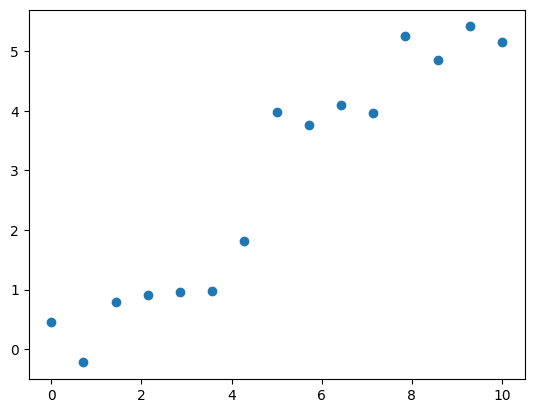

saved x, y dataset as 'linear2.csv' in directory '/home/david/gh/intro_curve_fitting_python/linear_data'



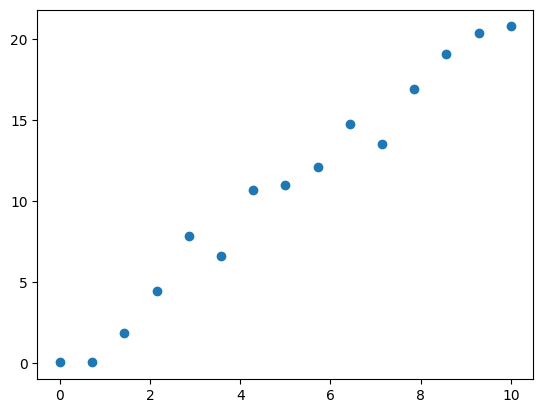

saved x, y dataset as 'linear3.csv' in directory '/home/david/gh/intro_curve_fitting_python/linear_data'



In [51]:
# run the function two more times, with different parameters each time,
# saving the datasets along the way

minx = 0
maxx = 10
minm = 0
maxm = 1
minb = 0
maxb = 10
dec = 0.2
nump = 15

x,y = mklineards(minx, maxx, minm, maxm, minb, maxb, dec, nump)
plt.scatter(x,y)
plt.show()

savexy(x,y,'linear2.csv')

minx = 0
maxx = 10
minm = -10
maxm = 10
minb = -10
maxb = 10
dec = 0.05
nump = 15

x,y = mklineards(minx, maxx, minm, maxm, minb, maxb, dec, nump)
plt.scatter(x,y)
plt.show()

savexy(x,y,'linear3.csv')

## Create noisy exponential decay data sets 

In [52]:
# create exponential (decay) data
# set exponential data directory:
datadir = basedir+'/exponential_data'

k: -0.612 (e.g., per second)

lifetime: 1.635 (e.g., seconds)

maxx: 6.000 (e.g., seconds)



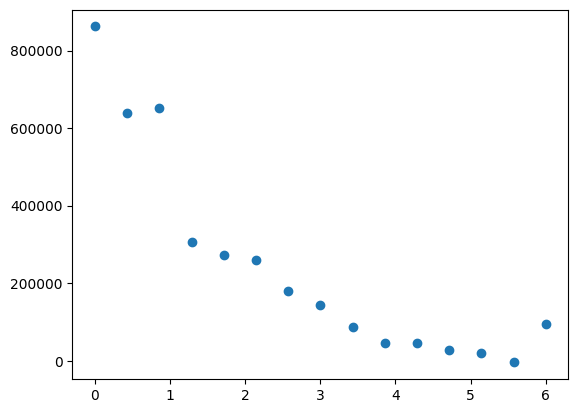

In [53]:
# develop the algorithm

# define an arbitrary exponential (assumed to be decay) function
# that goes to zero at large x
def expdf(x, k, A):
    return A * np.exp(k*x)

# choose a random value for k, the decay constant, in the range
# -1 <= k <= 0
k = np.random.uniform(low=-1, high=0)
print(f'k: %.3f (e.g., per second)\n' % (k))

# given k, compute the lifetime
l = -1/k
print(f'lifetime: %.3f (e.g., seconds)\n' % (l))

# randomly choose maxx between 3 and 6 lifetimes
maxx = np.ceil(np.random.uniform(low=3*l, high=6*l))
print(f'maxx: %.3f (e.g., seconds)\n' % (maxx))

# randomly choose an A value on the interval 0, 1000000
A = np.random.uniform(low=1, high=1000000)

# create 15 uniformly spaced points between, and including, 0 and maxx
x = np.linspace(0, maxx, 15)

# create the corresponding y values
y = expdf(x,k,A)

# add random noise to the y values
dec = 0.05
nump = 15
y = y + np.random.normal(0, dec*(np.max(y) - np.min(y)), nump)

# scatter plot and show
plt.scatter(x,y)
plt.show()

In [54]:
# create a function to implement the algorithm given the necessary input parameters

def mkexpdecayds(mink, maxk, minxlifetimes, maxxlifetimes, minA, maxA, ylimit, dec, nump):
    # in which:
    # mink, maxk are limits to the range in which to choose the decay constant
    # maxk assumed to be negative; see ylimit
    # minxlifetimes and maxxlifetimes are the minimum and maximum right-hand most values
    # on the x axis, in multiples of the lifetime of the process
    # minA and maxA are limits to the range in which to choose the zero point magnitude of the function
    # ylimit is the value of the function at large x
    # dec is the decimal (fraction) value to multiply by (y(max)-y(min)) to 
    # determine the input parameter sigma in the noise function and
    # nump are the number of points to generate
    k = np.random.uniform(low=mink, high=maxk)
    maxx = -1/k * np.random.uniform(low=minxlifetimes, high=minxlifetimes)
    A = np.random.uniform(low=minA, high=maxA)
    x = np.linspace(0, maxx, nump)
    y = ylimit + A*np.exp(k*x)
    y = y + np.random.normal(0, dec*(np.max(y) - np.min(y)), nump)
    return x,y

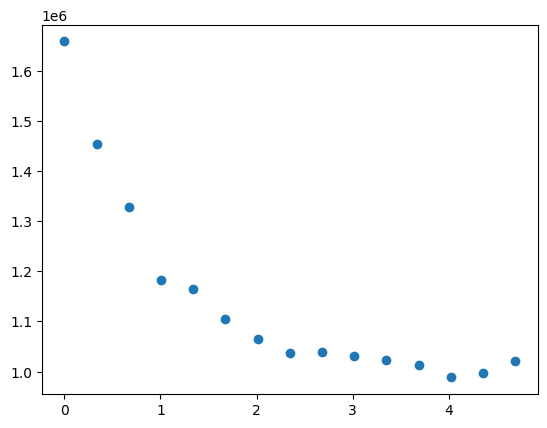

saved x, y dataset as 'exponential1.csv' in directory '/home/david/gh/intro_curve_fitting_python/exponential_data'



In [55]:
mink=-1.1
maxk=-0.9
minxlifetimes=4.9
maxxlifetimes=5.1
minA=20000
maxA=1000000
ylimit=1000000
dec=0.02
nump=15

x,y = mkexpdecayds(mink, maxk, minxlifetimes, maxxlifetimes, minA, maxA, ylimit, dec, nump)
plt.scatter(x,y)
plt.show()
savexy(x,y,'exponential1.csv')

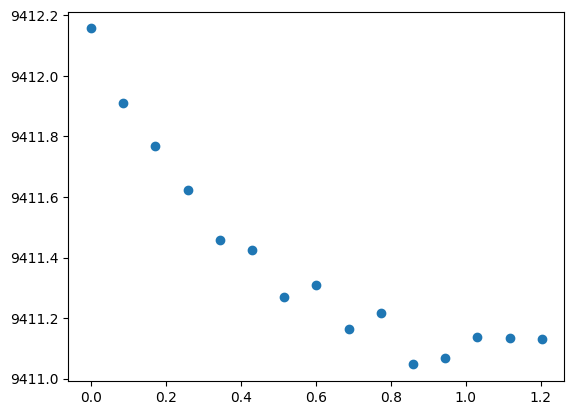

saved x, y dataset as 'exponential2.csv' in directory '/home/david/gh/intro_curve_fitting_python/exponential_data'



In [56]:
mink=-10
maxk=-1
minxlifetimes=3
maxxlifetimes=5
minA=1
maxA=10
ylimit=9411
dec=0.05
nump=15

x,y = mkexpdecayds(mink, maxk, minxlifetimes, maxxlifetimes, minA, maxA, ylimit, dec, nump)
plt.scatter(x,y)
plt.show()
savexy(x,y,'exponential2.csv')

In [57]:
# make a slightly more interesting function just for fun:

def mkexpdecayds1(mink, maxk, minxlifetimes, maxxlifetimes, minA, maxA, ylimit, dec, nump):
    # in which:
    # mink, maxk are limits to the range in which to choose the decay constant
    # maxk assumed to be negative; see ylimit
    # minxlifetimes and maxxlifetimes are the minimum and maximum right-hand most values
    # on the x axis, in multiples of the lifetime of the process
    # minA and maxA are limits to the range in which to choose the zero point magnitude of the function
    # ylimit is the value of the function at large x
    # dec is the decimal (fraction) value to multiply by (y(max)-y(min)) to 
    # determine the input parameter sigma in the noise function and
    # nump are the number of points to generate
    k = np.random.uniform(low=mink, high=maxk)
    maxx = -1/k * np.random.uniform(low=minxlifetimes, high=minxlifetimes)
    A = np.random.uniform(low=minA, high=maxA)
    x = np.linspace(0, maxx, nump)
    y = ylimit + (1-A*np.exp(k*x)) # this line changed wrt parent
    y = y + np.random.normal(0, dec*(np.max(y) - np.min(y)), nump)
    return x,y

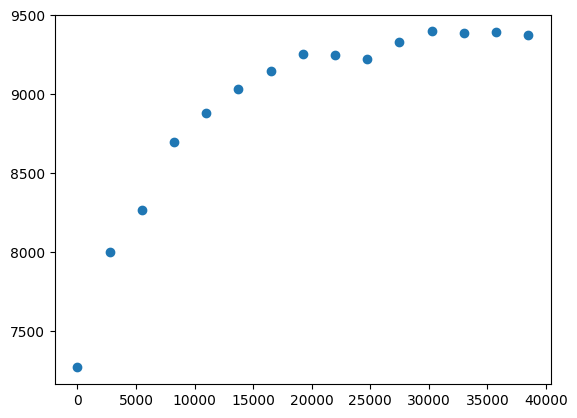

saved x, y dataset as 'exponential3.csv' in directory '/home/david/gh/intro_curve_fitting_python/exponential_data'



In [58]:
mink=-0.001
maxk=-0.00001
minxlifetimes=5
maxxlifetimes=7
minA=1000
maxA=5000
ylimit=9411
dec=0.03
nump=15

x,y = mkexpdecayds1(mink, maxk, minxlifetimes, maxxlifetimes, minA, maxA, ylimit, dec, nump)
plt.scatter(x,y)
plt.show()
savexy(x,y,'exponential3.csv')

## Create a noisy sinusoidal decay data set

Imagine the real component of an FID from a solution of 1% H$_2$O in D$_2$O providing a signal at 4.7 ppm, on a 600 mHz instrument, a Nyquist frequency corresponding to 24 ppm; a 5s acquisition time, with the signal having a lifetime of 0.5s. 

In [ ]:
def edsin(np.sin(